In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("./zomato_data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of resturant

Text(0.5, 0, 'Type of Resturant')

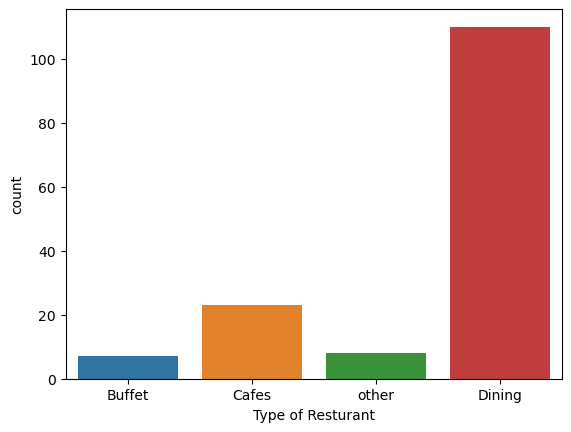

In [14]:
sbn.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Resturant')

# Most number of voting

Text(0, 0.5, 'votes')

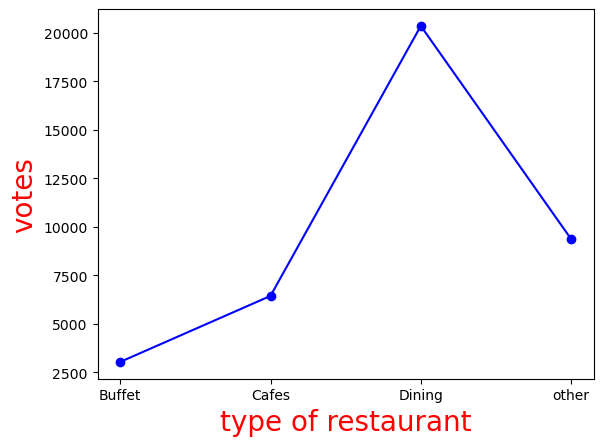

In [16]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = 'blue', marker = 'o')
plt.xlabel('type of restaurant', c = 'red', size = 20)
plt.ylabel('votes', c = 'red', size = 20)

# average order spend by two people

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

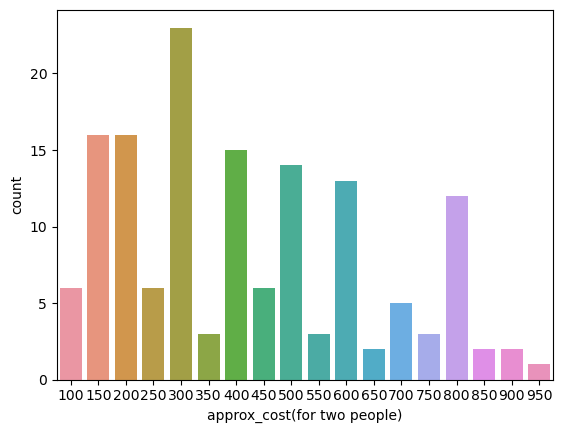

In [17]:
two_data = df['approx_cost(for two people)']
sbn.countplot(x = two_data)

# whic mode receive maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

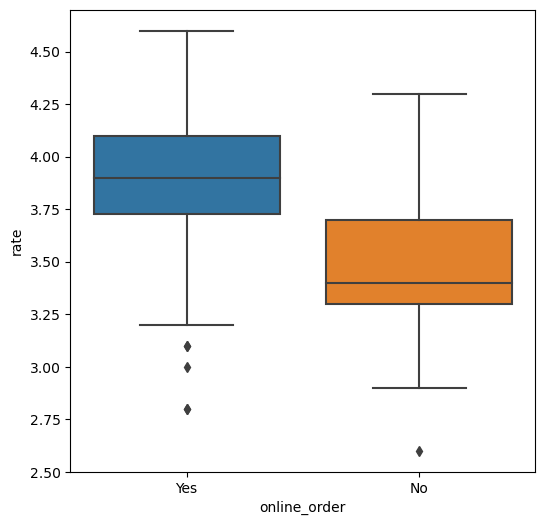

In [19]:
plt.figure(figsize=(6,6))
sbn.boxplot(x = 'online_order', y = 'rate', data = df)

# which type of restaurant received more offline orders, so that they give more order

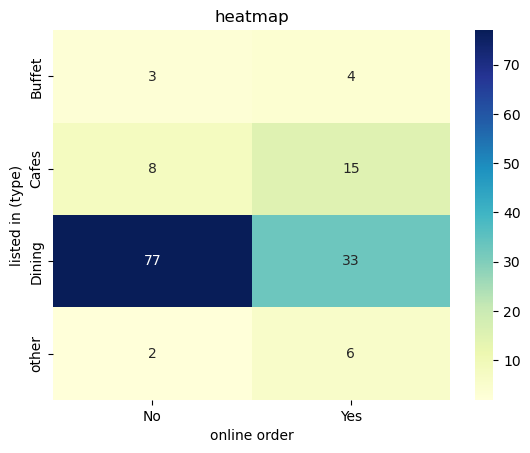

In [21]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sbn.heatmap(pivot_table, annot=True, cmap = 'YlGnBu', fmt = 'd')
plt.title('heatmap')
plt.xlabel('online order')
plt.ylabel('listed in (type)')
plt.show()